# 8.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'a' : [0, 0, 0, 0, 1, 1, 1, 1],
                   'b' : [0, 0, 1, 1, 0, 0, 1, 1],
                   'c' : [0, 1, 0, 1, 0, 1, 0, 1],
                   'p' : [0.192, 0.144, 0.048, 0.216, 
                          0.192, 0.064, 0.048, 0.096]})
print(df)

   a  b  c      p
0  0  0  0  0.192
1  0  0  1  0.144
2  0  1  0  0.048
3  0  1  1  0.216
4  1  0  0  0.192
5  1  0  1  0.064
6  1  1  0  0.048
7  1  1  1  0.096


## Part 1: Show $p(a)p(b) \neq p(a,b)$

Compute margial probabilities

In [3]:
p_a1 = sum(df[df.a==1].p) # P(a=1)
p_b1 = sum(df[df.b==1].p) # P(b=1)
p_a0 = sum(df[df.a==0].p) # P(a=0)
p_b0 = sum(df[df.b==0].p) # P(b=0)

Compute product of marginal probabilities $P(a=1)*P(b=1)$

In [4]:
print(round(p_a1*p_b1, 3))

0.163


Compute joint probability $P(a=1, b=1)$

In [5]:
print(round(sum(df[(df.a==1) & (df.b==1)].p), 3))

0.144


Note that these are different, hence $p(a)p(b) \neq p(a,b)$

## Part 2: Show $p(a|c)p(b|c) = p(a,b|c)$

Note that $p(a|c) = p(a,c)/p(c)$  
and $p(a,b|c) = p(a,b,c)/p(c)$  

In [6]:
p_a1_c1 = sum(df[(df.a==1) & (df.c==1)].p) # P(a=1, c=1)
p_a0_c1 = sum(df[(df.a==0) & (df.c==1)].p) # P(a=0, c=1)
p_a1_c0 = sum(df[(df.a==1) & (df.c==0)].p) # P(a=1, c=0)
p_a0_c0 = sum(df[(df.a==0) & (df.c==0)].p) # P(a=0, c=0)

p_b1_c1 = sum(df[(df.b==1) & (df.c==1)].p) # P(b=1, c=1)
p_b0_c1 = sum(df[(df.b==0) & (df.c==1)].p) # P(b=0, c=1)
p_b1_c0 = sum(df[(df.b==1) & (df.c==0)].p) # P(b=1, c=0)
p_b0_c0 = sum(df[(df.b==0) & (df.c==0)].p) # P(b=0, c=0)

p_c1 = sum(df[df.c==1].p) # P(c=1)
p_c0 = sum(df[df.c==0].p) # P(c=0)

p_a1_b1_c1 = sum(df[(df.a==1) & (df.b==1) & (df.c==1)].p) # P(a=1, b=1, c=1)
p_a0_b1_c1 = sum(df[(df.a==0) & (df.b==1) & (df.c==1)].p) # P(a=0, b=1, c=1)
p_a0_b0_c1 = sum(df[(df.a==0) & (df.b==0) & (df.c==1)].p) # P(a=0, b=0, c=1)
p_a1_b0_c1 = sum(df[(df.a==1) & (df.b==0) & (df.c==1)].p) # P(a=1, b=0, c=1)
p_a1_b1_c0 = sum(df[(df.a==1) & (df.b==1) & (df.c==0)].p) # P(a=1, b=1, c=0)
p_a0_b1_c0 = sum(df[(df.a==0) & (df.b==1) & (df.c==0)].p) # P(a=0, b=1, c=0)
p_a0_b0_c0 = sum(df[(df.a==0) & (df.b==0) & (df.c==0)].p) # P(a=0, b=0, c=0)
p_a1_b0_c0 = sum(df[(df.a==1) & (df.b==0) & (df.c==0)].p) # P(a=1, b=0, c=0)

Check if $p(a|c)p(b|c) = p(a,b|c)$ for all combinations of a, b, c in \{0, 1\}

In [7]:
print(p_a1_c1/p_c1 * p_b1_c1/p_c1 == p_a1_b1_c1/p_c1)
print(p_a0_c1/p_c1 * p_b1_c1/p_c1 == p_a0_b1_c1/p_c1)
print(p_a0_c1/p_c1 * p_b0_c1/p_c1 == p_a0_b0_c1/p_c1)
print(p_a1_c1/p_c1 * p_b0_c1/p_c1 == p_a1_b0_c1/p_c1)
print(p_a1_c0/p_c0 * p_b1_c0/p_c0 == p_a1_b1_c0/p_c0)
print(p_a0_c0/p_c0 * p_b1_c0/p_c0 == p_a0_b1_c0/p_c0)
print(p_a0_c0/p_c0 * p_b0_c0/p_c0 == p_a0_b0_c0/p_c0)
print(p_a1_c0/p_c0 * p_b0_c0/p_c0 == p_a1_b0_c0/p_c0)

True
True
True
True
True
True
True
True


All are true, so it holds.

# 8.4

Note that $p(c|a)=p(c,a)/p(a)$ so $p(a)*p(c|a) = p(c,a)$  
hence, $p(a)*p(c|a)*p(b|c) = p(c,a) * p(b,c)/p(c)$ 

In [8]:
error = 10**(-10)

In [9]:
print(p_a1_c1 * p_b1_c1/p_c1 - p_a1_b1_c1 < error)
print(p_a0_c1 * p_b1_c1/p_c1 - p_a0_b1_c1 < error)
print(p_a0_c1 * p_b0_c1/p_c1 - p_a0_b0_c1 < error)
print(p_a1_c1 * p_b0_c1/p_c1 - p_a1_b0_c1 < error)
print(p_a1_c0 * p_b1_c0/p_c0 - p_a1_b1_c0 < error)
print(p_a0_c0 * p_b1_c0/p_c0 - p_a0_b1_c0 < error)
print(p_a0_c0 * p_b0_c0/p_c0 - p_a0_b0_c0 < error)
print(p_a1_c0 * p_b0_c0/p_c0 - p_a1_b0_c0 < error)

True
True
True
True
True
True
True
True


# Programming exercises

## A.
Sample X and compute y

In [25]:
N = 20
X = np.random.normal(size = (N,2))
theta = np.array([-1, 1])
d = len(theta)
sigmasqr_y =0.1
y = X@theta  + sigmasqr_y**0.5*np.random.randn(X.shape[0])

## B.
Compute posterior distribution and plot the pdf in $[-3,3]^2$  
See page 29 in lecture notes

In [26]:
# Estimate mean and covariance matrix for theta
C = np.linalg.inv(sigmasqr_y * np.eye(N) + X @X.T)
mu = X.T@C@y
Sigma = np.eye(d) - X.T@C@X

In [27]:
Sigma

array([[0.00510777, 0.00010633],
       [0.00010633, 0.00398863]])

In [22]:
# Estimate the pdf
from scipy.stats import multivariate_normal
mvn = multivariate_normal(mu,Sigma)

In [14]:
# Create a grid of the values, where we want to evaluate the pdf
step = 0.02
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

In [15]:
# Evaluate the pdf on the grid
p = mvn.pdf(xy)
p = p.reshape(K,K)

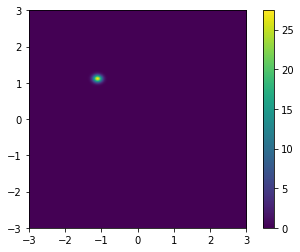

In [16]:
# Plot
plt.imshow(p.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

## C.

In [17]:
# Create a grid of the values, where we want to evaluate the pdf
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

In [18]:
# Variance
y_var = np.sum((xy@Sigma)*xy,axis=1) + sigmasqr_y
y_var = y_var.reshape(K,K)

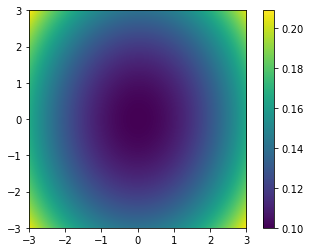

In [19]:
# Plot
plt.imshow(y_var.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

## D.

In [122]:
N = 20
sigmasqr_y = 0.1
X = np.random.normal(size = (N,2))
#X[:,0] *= 0.01**0.5
#y = X@theta  + sigmasqr_y**0.5*np.random.randn(X.shape[0])

SigmaX = np.eye(2)
SigmaX[0,0] = 0.1
mvnXD = multivariate_normal(np.zeros(2),SigmaX)

X = mvnXD.rvs(size=N)
y = X@theta  + sigmasqr_y**0.5*np.random.randn(X.shape[0])

### D. (B)

In [123]:
# Estimate mean and covariance matrix for theta
C = np.linalg.inv(sigmasqr_y * np.eye(N) + X @X.T)
mu = X.T@C@y
Sigma = np.eye(d) - X.T@C@X

In [131]:
print(mu)
Sigma

[-0.88278783  1.00633859]


array([[0.09753047, 0.00217732],
       [0.00217732, 0.00318731]])

In [124]:
# Create a grid of the values, where we want to evaluate the pdf
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

In [125]:
# Estimate the pdf
mvn = multivariate_normal(mu,Sigma)
# Evaluate the pdf on the grid
p = mvn.pdf(xy)
p = p.reshape(K,K)

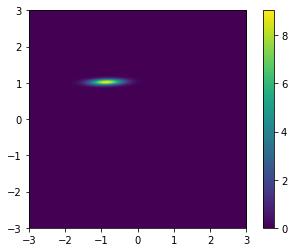

In [126]:
# Plot
plt.imshow(p.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

### D. (C)

In [127]:
# Create a grid of the values, where we want to evaluate the pdf
X,Y = np.mgrid[-3:3:step, -3:3:step]
K = X.shape[0]
xy = np.vstack((X.flatten(), Y.flatten())).T

In [128]:
# Variance
y_var = np.sum((xy@Sigma)*xy,axis=1) + sigmasqr_y
y_var = y_var.reshape(K,K)

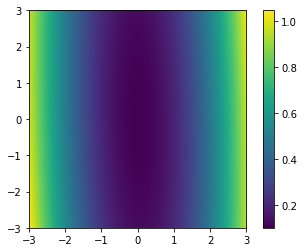

In [129]:
# Plot
plt.imshow(y_var.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

The variance of $x_1$ is now only 0.1, which makes it harder to estimate $\mu_1$.  
Decreasing the error term improves the estimation of mu.

## Extra
### Prior of theta

In [32]:
print(mu)
print(Sigma)

[-0.98927452  0.97956521]
[[0.00510777 0.00010633]
 [0.00010633 0.00398863]]


In [43]:
# Estimate the pdf
mvn = multivariate_normal(theta,np.eye(2))
# Evaluate the pdf on the grid
p = mvn.pdf(xy)
p = p.reshape(K,K)

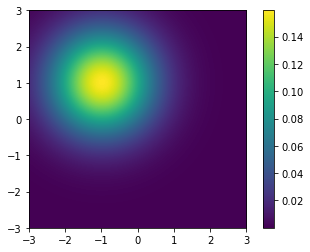

In [44]:
# Plot
plt.imshow(p.T, origin="lower", extent=[-3,3,-3,3])
plt.colorbar()
plt.show()